In [1]:
library("ggplot2")
library("reshape2")
# change size of inline plots
options(repr.plot.width=8, repr.plot.height=3)

In [2]:
df = read.csv('inputs/storm_modelling.csv')

In [3]:
df$`Total Rainfall` = df$Intensity * df$Duration
# filter out the 1600s data
df = df[df$start > 1600,]
# melt so we can use facet_grid
df = melt(df, id.vars=c('model', 'rain_event_type', 'start', 'end', 'Duration'))

In [4]:
g = ggplot(df) +
    labs(x='Year', y=NULL) +
    # tilde is just overloaded to do something completely different here
    facet_grid(variable ~ rain_event_type, scales="free", switch="y") + 
    geom_segment(aes(x=start, y=value, xend=end, yend=value, color=model)) +
    #geom_text(aes(label=round(df$value, 2), x=start, y=value)) +
    theme_minimal() +
    theme(legend.position="bottom") + 
    scale_colour_manual(values=c("black", "red")) +
    scale_x_continuous(breaks=seq(1970, 2110, 40))

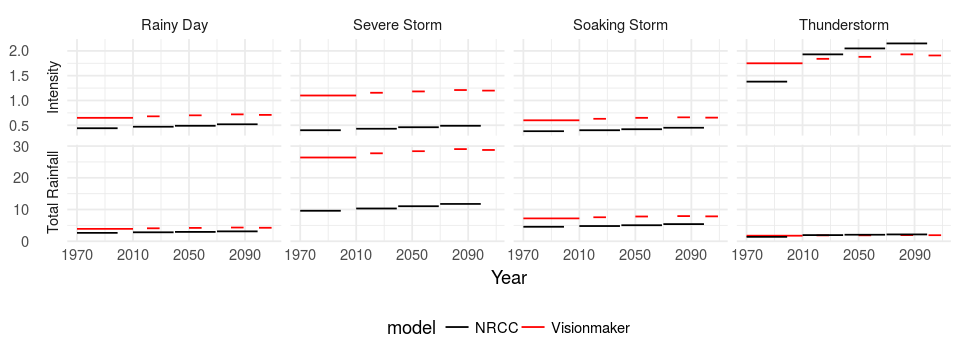

In [6]:
g

In [7]:
ggsave("outputs/storm_parameters.png", g, width=6.5, height=4, dpi=300, units="in")